# Task 2-  Stock Market Prediction and Forecasting using Stacked 

# Submitted by - Rahul Sakharkar

In [2]:
pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.6 MB/s eta 0:00:00
     ------------------------------------- 177.2/177.2 kB 11.1 MB/s eta 0:00:00
     -------------------------------------- 781

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
print(df)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [6]:
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:

df.index

RangeIndex(start=0, stop=2035, step=1)

In [9]:

df.shape

(2035, 8)

In [10]:

df.size

16280

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [12]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [13]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [14]:
df_close = df['Close']
df_close.shape

(2035,)

In [15]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

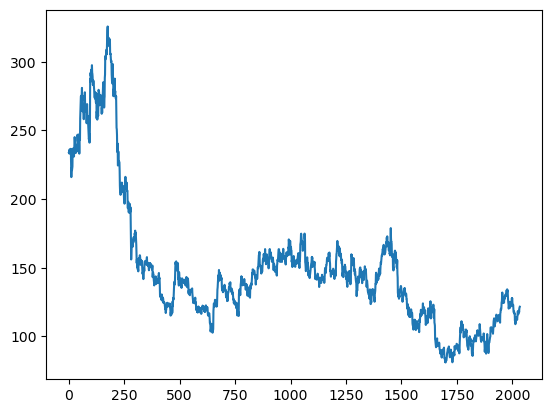

In [16]:
plt.plot(df_close)

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 14s 290ms/step - loss: 0.0255 - val_loss: 0.0087
Epoch 2/100
23/23 [==============================] - 6s 256ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 3/100
23/23 [==============================] - 7s 284ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/100
23/23 [==============================] - 7s 289ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 7s 298ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 7s 314ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 8s 329ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 9s 375ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 7s 326ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 7s 318ms/step - loss: 0.0011 - val_l

23/23 [==============================] - 7s 307ms/step - loss: 2.8999e-04 - val_loss: 2.3235e-04
Epoch 77/100
23/23 [==============================] - 7s 324ms/step - loss: 2.6901e-04 - val_loss: 2.2482e-04
Epoch 78/100
23/23 [==============================] - 8s 363ms/step - loss: 2.9389e-04 - val_loss: 2.1182e-04
Epoch 79/100
23/23 [==============================] - 7s 314ms/step - loss: 2.5714e-04 - val_loss: 3.0933e-04
Epoch 80/100
23/23 [==============================] - 7s 316ms/step - loss: 2.5623e-04 - val_loss: 2.9975e-04
Epoch 81/100
23/23 [==============================] - 7s 303ms/step - loss: 2.3956e-04 - val_loss: 2.6520e-04
Epoch 82/100
23/23 [==============================] - 7s 304ms/step - loss: 2.3675e-04 - val_loss: 2.9811e-04
Epoch 83/100
23/23 [==============================] - 8s 348ms/step - loss: 2.3411e-04 - val_loss: 2.1058e-04
Epoch 84/100
23/23 [==============================] - 7s 327ms/step - loss: 2.2495e-04 - val_loss: 2.3322e-04
Epoch 85/100
23/23 [===

In [19]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

162.4911853218955

In [20]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

105.08681236646783

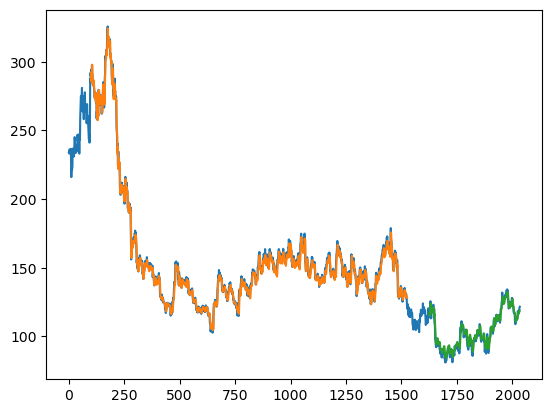

In [21]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [23]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=300
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>300):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(-1,1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [28]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df_close.tolist()
df3.extend(lst_output)

len(df_close)

2035

In [29]:
# plt.plot(day_new, scaler.inverse_transform(df_close()))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.